In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [4]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
# Add 'overweight' column
def calculate_bmi(weight, height):
    # Convert height from cm to meters
    height_m = height / 100
    
    # Calculate BMI
    bmi = weight / (height_m ** 2)
    return bmi

In [6]:
# Apply the BMI function to create a new column "bmi"
df['bmi'] = df.apply(lambda row: calculate_bmi(row['weight'], row['height']), axis=1)

In [7]:
# Create "overweight" column based on BMI values
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)

In [8]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = df['cholesterol'].replace({1: 0, 2: 1, 3: 1})
df['gluc'] = df['gluc'].replace({1: 0, 2: 1, 3: 1})

In [9]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [21]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
# Select columns for pd.melt
    cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']

# Use pd.melt to convert data into long format
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=cols)

# Create a catplot
    g = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count', height=4, aspect=1)

# Set plot titles
    g.set_titles('{col_name} cardio={col_var}')

# Set axis labels
    g.set_axis_labels('Variable', 'Value Counts')

# Show the plot
    plt.show()

# Get the figure for the output
    fig = g.fig


# Do not modify the next two lines
    fig.savefig('catplot.png')
    return 

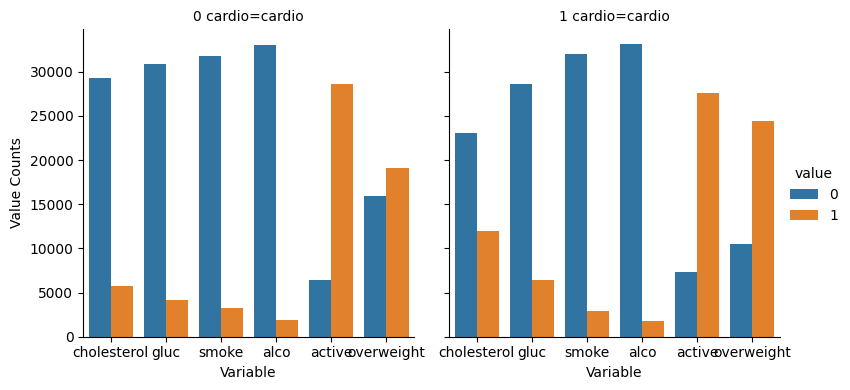

In [22]:
draw_cat_plot()

In [23]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[df['ap_lo'] <= df['ap_hi']]

# Filter out height less than 2.5th percentile and height more than 97.5th percentile
    height_lower_percentile = df_heat['height'].quantile(0.025)
    height_upper_percentile = df_heat['height'].quantile(0.975)
    df_heat = df_heat[(df_heat['height'] >= height_lower_percentile) & (df_heat['height'] <= height_upper_percentile)]

# Filter out weight less than 2.5th percentile and weight more than 97.5th percentile
    weight_lower_percentile = df_heat['weight'].quantile(0.025)
    weight_upper_percentile = df['weight'].quantile(0.975)
    df_heat = df_heat[(df_heat['weight'] >= weight_lower_percentile) & (df_heat['weight'] <= weight_upper_percentile)]




# Calculate the correlation matrix
    corr = df_heat.corr()

# Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, ax=ax)


# Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

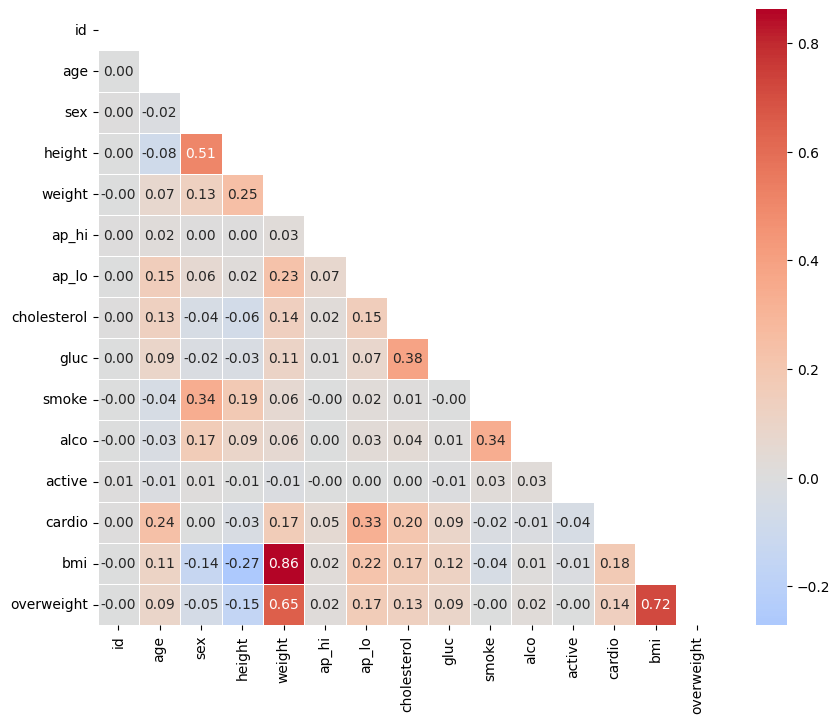

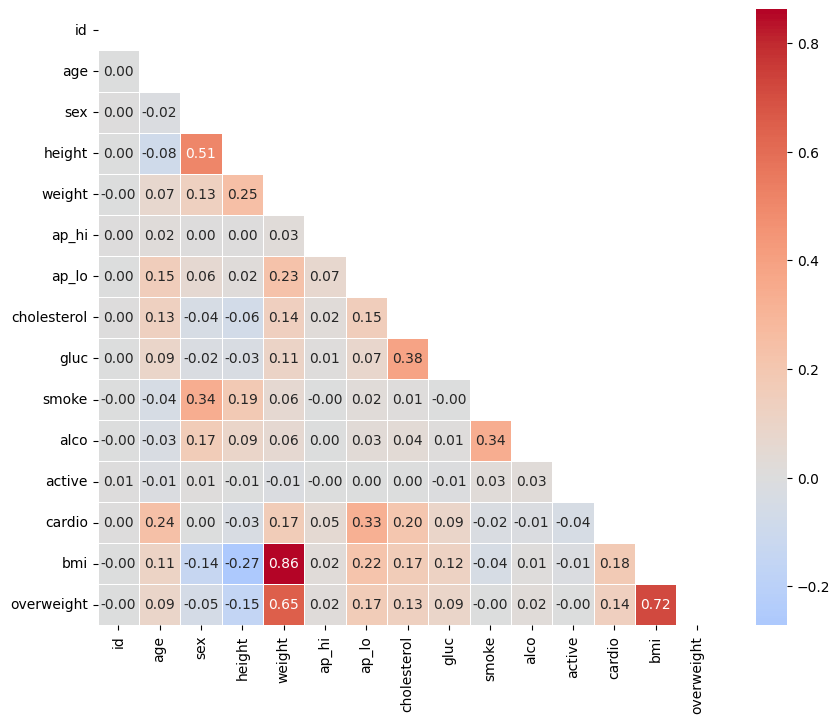

In [24]:
draw_heat_map()